In [ ]:
# Machine Learning
# Assignment_1
# 20206147 서은서

###1. Import the pachages needed for learning.

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms,datasets
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

### 2. Involves loading the data will be used for learning.

In [ ]:
# CIFAR-10 dataset
# MNIST dataset

In [ ]:
# CIFAR-10
CIFAR_transform_train = transforms.Compose([transforms.ToTensor()])
CIFAR_transform_test = transforms.Compose([transforms.ToTensor()])

In [ ]:
trainset_CIFAR = datasets.CIFAR10(root="./data",train=True , download=True, transform=CIFAR_transform_train)
testset_CIFAR = datasets.CIFAR10(root="./data",train=False , download=True, transform=CIFAR_transform_test)

100%|██████████| 170498071/170498071 [00:02<00:00, 69520627.92it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
CIFAR_train = DataLoader(trainset_CIFAR,batch_size=32,shuffle=True,num_workers=2)
CIFAR_test = DataLoader(testset_CIFAR,batch_size=32,shuffle=False,num_workers=2)

In [ ]:
CIFAR_train_images=[]
CIFAR_train_labels=[]

In [ ]:
for batch in CIFAR_train:
  images,labels = batch
  images_flat = images.view(images.shape[0],-1)
  CIFAR_train_images.append(images_flat.numpy())
  CIFAR_train_labels.append(labels.numpy())

In [ ]:
CIFAR_train_images = np.vstack(CIFAR_train_images)
CIFAR_train_labels = np.concatenate(CIFAR_train_labels)

In [ ]:
print(CIFAR_train_images.ndim,CIFAR_train_images.shape)
print(CIFAR_train_labels.ndim,CIFAR_train_labels.shape)

2 (50000, 3072)
1 (50000,)


In [ ]:
CIFAR_test_images=[]
CIFAR_test_labels=[]

In [ ]:
for batch in CIFAR_test:
  images,labels=batch
  images_flat=images.view(images.shape[0],-1)
  CIFAR_test_images.append(images_flat.numpy())
  CIFAR_test_labels.append(labels.numpy())

In [ ]:
CIFAR_test_images=np.vstack(CIFAR_test_images)
CIFAR_test_labels=np.concatenate(CIFAR_test_labels)

In [ ]:
print(CIFAR_test_images.ndim,CIFAR_test_images.shape)
print(CIFAR_test_labels.ndim,CIFAR_test_labels.shape)

2 (10000, 3072)
1 (10000,)


### 3. MNIST dataset can be obtained in a similar way that the CIFAR-10 dataset is collected.

In [ ]:
#MNIST
mnist_train_transform = transforms.Compose([transforms.ToTensor()])
mnist_test_transform = transforms.Compose([transforms.ToTensor()])

In [ ]:
trainset_mnist = datasets.MNIST(root="./data",train=True, download=True, transform=mnist_train_transform)
testset_mnist = datasets.MNIST(root="./data",train=False, download=True, transform=mnist_test_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 72818607.69it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 75192857.74it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26574030.34it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1800446.91it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
MNIST_train = DataLoader(trainset_mnist, batch_size=32,shuffle=True, num_workers=2)
MNIST_test = DataLoader(testset_mnist, batch_size=32,shuffle=False, num_workers=2)

In [ ]:
MNIST_train_images=[]
MNIST_train_labels=[]
for batch in MNIST_train:
  images,labels=batch
  images_flat=images.view(images.shape[0],-1)
  MNIST_train_images.append(images_flat.numpy())
  MNIST_train_labels.append(labels.numpy())

In [ ]:
MNIST_train_images=np.vstack(MNIST_train_images)
MNIST_train_labels=np.concatenate(MNIST_train_labels)

In [ ]:
MNIST_test_images=[]
MNIST_test_labels=[]
for batch in MNIST_test:
  images,labels=batch
  images_flat=images.view(images.shape[0],-1)
  MNIST_test_images.append(images_flat.numpy())
  MNIST_test_labels.append(labels.numpy())

In [ ]:
MNIST_test_images=np.vstack(MNIST_test_images)
MNIST_test_labels=np.concatenate(MNIST_test_labels)

In [ ]:
print(MNIST_train_images.ndim,MNIST_train_images.shape)
print(MNIST_train_labels.ndim,MNIST_train_labels.shape)

2 (60000, 784)
1 (60000,)


In [ ]:
print(MNIST_test_images.ndim,MNIST_test_images.shape)
print(MNIST_test_labels.ndim,MNIST_test_labels.shape)

2 (10000, 784)
1 (10000,)


### Decision Tree

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### CIFAR-10 dataset

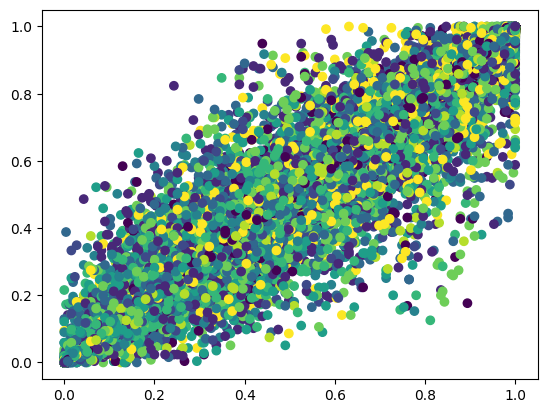

In [ ]:
plt.scatter(CIFAR_train_images[:,0],CIFAR_train_images[:,1],c=CIFAR_train_labels)

In [ ]:
# hyperparameters 튜닝 전의 정확도

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(CIFAR_train_images,CIFAR_train_labels)
pred = dtree.predict(CIFAR_test_images)
accuracy = accuracy_score(CIFAR_test_labels,pred)
print("예측 정확도: {0:,.4f}".format(accuracy))

예측 정확도: 0.2684


In [ ]:
params_grid={
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_leaf_nodes':[5,10,None],
}

In [ ]:
grid_search = GridSearchCV(dtree,param_grid=params_grid,cv=5,scoring='accuracy',refit=True)

In [ ]:
grid_search.fit(CIFAR_train_images,CIFAR_train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# hyperparameters 튜닝 후의 정확도

In [ ]:
print('best parameters : ', grid_search.best_params_)
print('best score : ', round(grid_search.best_score_, 4))

best parameters :  {'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
best score :  0.2681


In [ ]:
# hyperparameters를 적용한 Decision tree

In [ ]:
dtree_3 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)
# depth가 3인 decision tree

In [ ]:
dtree_6 = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)
# depth가 6인 decision tree

In [ ]:
dtree_9 = DecisionTreeClassifier(max_depth=9,max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)
# depth가 9인 decision tree

In [ ]:
dtree_12 = DecisionTreeClassifier(max_depth=12,max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)
# depth가 12인 decision tree

In [ ]:
print("using 'depth=3' decision tree")
dtree_3.fit(CIFAR_train_images,CIFAR_train_labels)
pred_3 = dtree_3.predict(CIFAR_test_images)
accuracy_3 = accuracy_score(CIFAR_test_labels,pred_3)
print("예측 정확도: {0:,.4f}".format(accuracy_3))

using 'depth=3' decision tree
예측 정확도: 0.2394


In [ ]:
print("using 'depth=6' decision tree")
dtree_6.fit(CIFAR_train_images,CIFAR_train_labels)
pred_6 = dtree_6.predict(CIFAR_test_images)
accuracy_6 = accuracy_score(CIFAR_test_labels,pred_6)
print("예측 정확도: {0:,.4f}".format(accuracy_6))

using 'depth=6' decision tree
예측 정확도: 0.2812


In [ ]:
print("using 'depth=9' decision tree")
dtree_9.fit(CIFAR_train_images,CIFAR_train_labels)
pred_9 = dtree_9.predict(CIFAR_test_images)
accuracy_9 = accuracy_score(CIFAR_test_labels,pred_9)
print("예측 정확도: {0:,.4f}".format(accuracy_9))

using 'depth=9' decision tree
예측 정확도: 0.3043


In [ ]:
print("using 'depth=12' decision tree")
dtree_12.fit(CIFAR_train_images,CIFAR_train_labels)
pred_12 = dtree_12.predict(CIFAR_test_images)
accuracy_12 = accuracy_score(CIFAR_test_labels,pred_12)
print("예측 정확도: {0:,.4f}".format(accuracy_12))

using 'depth=12' decision tree
예측 정확도: 0.3041


In [ ]:
# accuracy on training and test sets in a table
import pandas as pd

col=['accuracy']
index=['3','6','9','12']
con=[[accuracy_3],[accuracy_6],[accuracy_9],[accuracy_12]]
accuracy_table = pd.DataFrame(con,columns=col,index=index)
print("accuracy on training and test sets in a table")
print()
print(accuracy_table)

accuracy on training and test sets in a table

    accuracy
3     0.2394
6     0.2812
9     0.3043
12    0.3041


In [ ]:
# depth = 9 일때 accuracy가 제일 높음

#### MNIST dataset

In [ ]:
# hyperparameters 튜닝 전의 정확도

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(MNIST_train_images,MNIST_train_labels)
pred = dtree.predict(MNIST_test_images)
accuracy = accuracy_score(MNIST_test_labels,pred)
print("예측 정확도: {0:,.4f}".format(accuracy))

예측 정확도: 0.8777


In [ ]:
params_grid={
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_leaf_nodes':[5,10,None],
}

In [ ]:
grid_search = GridSearchCV(dtree,param_grid=params_grid,cv=5,scoring='accuracy',refit=True)
grid_search.fit(MNIST_train_images,MNIST_train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_leaf_nodes': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# hyperparameters 튜닝 후의 정확도

In [60]:
print('best parameters : ', grid_search.best_params_)
print('best score : ', round(grid_search.best_score_, 4))

best parameters :  {'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 5}
best score :  0.8697


In [ ]:
# hyperparameters를 적용한 Decision tree

In [61]:
dtree_3 = DecisionTreeClassifier(max_depth=3,max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)

In [62]:
dtree_6 = DecisionTreeClassifier(max_depth=6,max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)

In [63]:
dtree_9 = DecisionTreeClassifier(max_depth=9,max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)

In [64]:
dtree_12 = DecisionTreeClassifier(max_depth=12,max_leaf_nodes=None,min_samples_leaf=4,min_samples_split=5)

In [65]:
print("using 'depth=3' decision tree")
dtree_3.fit(MNIST_train_images,MNIST_train_labels)
pred_3 = dtree_3.predict(MNIST_test_images)
accuracy_3 = accuracy_score(MNIST_test_labels,pred_3)
print("예측 정확도: {0:,.4f}".format(accuracy_3))

using 'depth=3' decision tree
예측 정확도: 0.4953


In [66]:
print("using 'depth=6' decision tree")
dtree_6.fit(MNIST_train_images,MNIST_train_labels)
pred_6 = dtree_6.predict(MNIST_test_images)
accuracy_6 = accuracy_score(MNIST_test_labels,pred_6)
print("예측 정확도: {0:,.4f}".format(accuracy_6))

using 'depth=6' decision tree
예측 정확도: 0.7415


In [67]:
print("using 'depth=9' decision tree")
dtree_9.fit(MNIST_train_images,MNIST_train_labels)
pred_9 = dtree_9.predict(MNIST_test_images)
accuracy_9 = accuracy_score(MNIST_test_labels,pred_9)
print("예측 정확도: {0:,.4f}".format(accuracy_9))

using 'depth=9' decision tree
예측 정확도: 0.8498


In [68]:
print("using 'depth=12' decision tree")
dtree_12.fit(MNIST_train_images,MNIST_train_labels)
pred_12 = dtree_12.predict(MNIST_test_images)
accuracy_12 = accuracy_score(MNIST_test_labels,pred_12)
print("예측 정확도: {0:,.4f}".format(accuracy_12))

using 'depth=12' decision tree
예측 정확도: 0.8768


In [69]:
col=['accuracy']
index=['3','6','9','12']
con=[[accuracy_3],[accuracy_6],[accuracy_9],[accuracy_12]]
accuracy_table = pd.DataFrame(con,columns=col,index=index)
print("accuracy on training and test sets in a table")
print()
print(accuracy_table)

accuracy on training and test sets in a table

    accuracy
3     0.4953
6     0.7415
9     0.8498
12    0.8768


In [ ]:
# depth = 12 일때 accuracy가 제일 높음